# Plot timeseries comparisons of aircraft and model data

This notebook will demonstrate how to plot multiple timeseries graphs, comparing aircraft pollution data to models.

## Setup imports

In [1]:
import matplotlib.pyplot as plt

import notebook_prepare as pre

## Define plotting function

Now that we've set up the imports, we can define the function producing the plots that we'll use later.

In [2]:
def plot_timeseries(df,key,outcome,label,a_colour,m_colour,model,plotdir) :

    # Define the figure.
    fig,ax = pre.setup_figure()

    # Define the data.
    time_data = df.index
    data = pre.read_data_values(df, model)

    # Plot the data.
    plt.plot(time_data,data['a_avg'],lw=5,c=a_colour,label='Aircraft')
    plt.fill_between(time_data,data['a_min'],data['a_max'],fc=a_colour,ec=None,alpha=0.5)
    
    if(model):
        plt.plot(time_data,data['m_avg'],lw=5,c=m_colour,label='Model')
        plt.fill_between(time_data,data['m_min'],data['m_max'],fc=m_colour,ec=None,alpha=0.5)
        # Add a legend.
        plt.legend(fontsize=30,markerscale=2)

    # Set the axes labels.
    plt.xlabel('Time / UTC',fontsize=50,labelpad=10)
    plt.ylabel(label,fontsize=50,labelpad=10)

    # Set the axes ticks.
    time_ticks,time_labels = pre.calculate_time_markers(time_data)
    plt.xticks(time_ticks,rotation=45)
    ax.set_xticklabels(time_labels)
    ax.tick_params(labelsize=30)

    if outcome == 'show':
        plt.show()

    elif outcome == 'save':
        plt.savefig(plotdir+key+'_Timeseries.png')
        plt.close()

## Specify the flight number & model data

In [3]:
# Set the flight number.
# Current valid options are C110, M270, M296 and M302.
flight_number = 'C110'  

# Specify whether you have model data to plot.
model = True

# Specify whether to save or just display the plots.
# Valid options are 'show' or 'save'.
outcome = 'show'

## Prepare the data and plot the timeseries for each pollution species

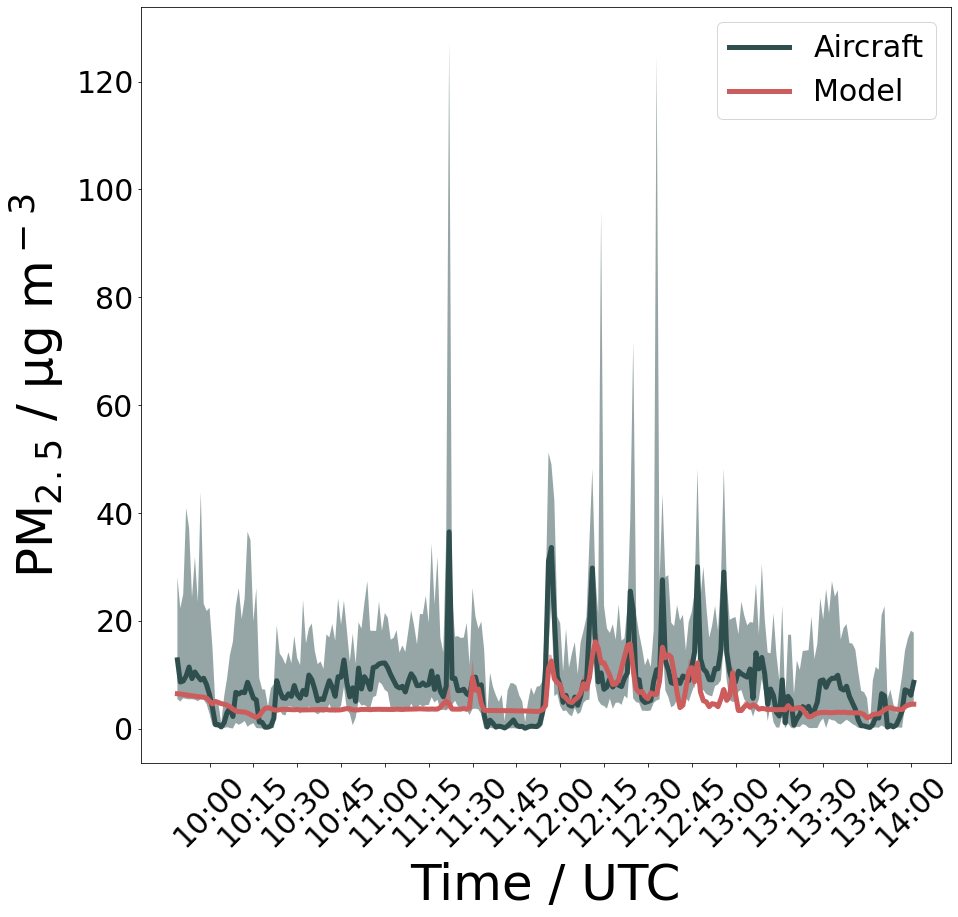

In [5]:
species_dict = pre.species_dictionary(flight_number)
setup = pre.setup_notebook(flight_number, model)
optns = setup[4]
for key in species_dict.keys() :
    code,label,column_key,unit_conv = species_dict[key]['code'],species_dict[key]['label'],species_dict[key]['column_key'],species_dict[key]['unit_conv']

        # Combine the aircraft and model data.
    df = pre.combine_data(setup,code)

        # Resample the data.
    resample_df = pre.resample_data(df,optns['resample_time'],optns['avg_method'],optns['min_method'],optns['max_method'],model)
    
    plot_timeseries(resample_df,key,outcome,label,optns['a_colour'],optns['m_colour'],model,setup[5])